In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Y = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321])

def f(x):
    y_pred = x[0] + x[1] * np.sin(x[2] * X) + x[3] * np.cos(x[4] * X)
    return np.sum((Y - y_pred) ** 2)

def grad_f(x):
    grad = np.zeros_like(x)
    
    grad[0] = np.sum(2 * (x[0] + x[1] * np.sin(x[2] * X) + x[3] * np.cos(x[4] * X) - Y))
    grad[1] = np.sum(2 * (x[0] + x[1] * np.sin(x[2] * X) + x[3] * np.cos(x[4] * X) - Y) * np.sin(x[2] * X))
    grad[2] = np.sum(2 * (x[0] + x[1] * np.sin(x[2] * X) + x[3] * np.cos(x[4] * X) - Y) * x[1] * X * np.cos(x[2] * X))
    grad[3] = np.sum(2 * (x[0] + x[1] * np.sin(x[2] * X) + x[3] * np.cos(x[4] * X) - Y) * np.cos(x[4] * X))
    grad[4] = np.sum(2 * (x[0] + x[1] * np.sin(x[2] * X) + x[3] * np.cos(x[4] * X) - Y) * (-x[3] * X * np.sin(x[4] * X)))
    
    return grad

def bisection_step_size(x, gradient):
    direction = -gradient
    alpha_lower = 0
    alpha_upper = 1
    epsilon = 1e-6
    while alpha_upper - alpha_lower > epsilon:
        alpha = (alpha_lower + alpha_upper) / 2
        h_prime_alpha = np.dot(grad_f(x + alpha * direction), direction)
        if h_prime_alpha < 0:
            alpha_lower = alpha
        else:
            alpha_upper = alpha
    return (alpha_lower + alpha_upper) / 2

def steepest_descent(x, max_iter=100, tol=1e-6):
    history = []
    for i in range(max_iter):
        grad = grad_f(x)
        lr = bisection_step_size(x, grad)
        x_new = x - lr * grad
        history.append((x_new, f(x_new)))
        if np.linalg.norm(grad) < tol:
            break
        x = x_new
    return x, history

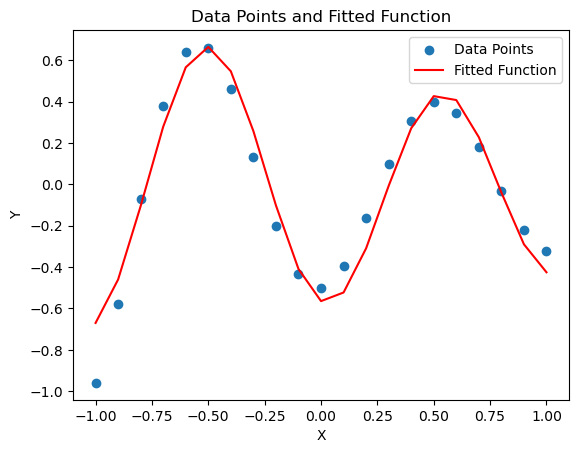

In [29]:
x0 = np.array([2, 4, 1, 0.2, 5])

optimized_params, history = steepest_descent(x0)

y_fitted = optimized_params[0] + optimized_params[1] * np.sin(optimized_params[2] * X) + optimized_params[3] * np.cos(optimized_params[4] * X)
plt.scatter(X, Y, label='Data Points')
plt.plot(X, y_fitted, color='red', label='Fitted Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points and Fitted Function')
plt.legend()
plt.savefig("Images/Part_A_3_b.pdf")
plt.show()

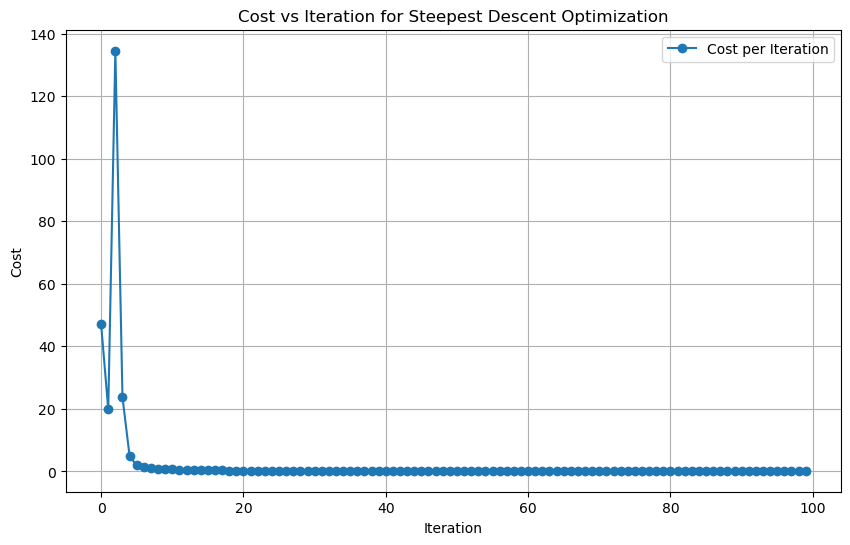

In [30]:
costs = [history[i][1] for i in range(len(history))]

plt.figure(figsize=(10, 6))
plt.plot(costs, marker='o', label='Cost per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration for Steepest Descent Optimization')
plt.legend()
plt.grid(True)
plt.savefig("Images/Part_A_3_c.pdf")
plt.show()